In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
jan = pd.read_csv('Resources/202001-citibike-tripdata.csv')
feb = pd.read_csv('Resources/202002-citibike-tripdata.csv')
mar = pd.read_csv('Resources/202003-citibike-tripdata.csv')
apr = pd.read_csv('Resources/202004-citibike-tripdata.csv')
may = pd.read_csv('Resources/202005-citibike-tripdata.csv')
jun = pd.read_csv('Resources/202006-citibike-tripdata.csv')

In [5]:
jf = jan.append(feb)

jf.dropna()

jfm = jf.append(mar)

jfm.dropna()

jfma = jfm.append(apr)

jfma.dropna()

jfmam = jfma.append(may)

jfmam.dropna()

full_dataset = jfmam.append(jun)

full_dataset.dropna()

full_dataset.columns = ['tripduration', 'starttime', 'stoptime', 'start_stationid', 'start_stationname', 'start_stationlat', 'start_stationlon', 
             'end_stationid', 'end_stationname', 'end_stationlat', 'end_stationlon', 'bikeid', 'usertype', 'birthyear', 'gender']


ValueError: Length mismatch: Expected axis has 19 elements, new values have 15 elements

In [4]:
#Split the start and stop time columns in two, then place the date values into a new column
datetime = full_dataset["starttime"].str.split(" ", n = 1, expand = True) 

full_dataset['startdate'] = datetime[0]

enddatetime = full_dataset["stoptime"].str.split(" ", n = 1, expand = True) 

full_dataset['stopdate'] = enddatetime[0]


In [5]:
#Get age by substrction birth year from 2020
full_dataset['age'] = 2020 - full_dataset['birthyear']


In [6]:
#Get time in minutes by dividing time in seconds by 60
full_dataset['duration(min)'] = round(full_dataset['tripduration']/60, 2)

full_dataset

,tripduration,starttime,stoptime,start_stationid,start_stationname,start_stationlat,start_stationlon,end_stationid,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,birthyear,gender,startdate,stopdate,age,duration(min)
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1,2020-01-01,2020-01-01,28,13.15
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1,2020-01-01,2020-01-01,51,25.68
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1,2020-01-01,2020-01-01,57,24.40
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1,2020-01-01,2020-01-01,40,9.87
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1,2020-01-01,2020-01-01,38,11.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,685,2020-06-30 23:59:41.1160,2020-07-01 00:11:06.7790,503,E 20 St & Park Ave,40.738274,-73.987520,3746,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,1993,2,2020-06-30,2020-07-01,27,11.42
1882269,446,2020-06-30 23:59:46.4260,2020-07-01 00:07:13.0860,3699,W 50 St & 9 Ave,40.763605,-73.989180,523,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,1969,0,2020-06-30,2020-07-01,51,7.43
1882270,439,2020-06-30 23:59:47.4770,2020-07-01 00:07:06.5590,3699,W 50 St & 9 Ave,40.763605,-73.989180,523,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,1986,1,2020-06-30,2020-07-01,34,7.32
1882271,890,2020-06-30 23:59:53.3950,2020-07-01 00:14:43.4270,3852,Stewart Ave & Johnson Ave,40.708690,-73.925870,3054,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,1994,1,2020-06-30,2020-07-01,26,14.83


In [7]:
del full_dataset['tripduration']
del full_dataset['starttime']
del full_dataset['stoptime']
del full_dataset['start_stationid']
del full_dataset['end_stationid']
del full_dataset['birthyear']

full_dataset

,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,gender,startdate,stopdate,age,duration(min)
0,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1,2020-01-01,2020-01-01,28,13.15
1,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1,2020-01-01,2020-01-01,51,25.68
2,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1,2020-01-01,2020-01-01,57,24.40
3,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1,2020-01-01,2020-01-01,40,9.87
4,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1,2020-01-01,2020-01-01,38,11.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,E 20 St & Park Ave,40.738274,-73.987520,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,2,2020-06-30,2020-07-01,27,11.42
1882269,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,0,2020-06-30,2020-07-01,51,7.43
1882270,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,1,2020-06-30,2020-07-01,34,7.32
1882271,Stewart Ave & Johnson Ave,40.708690,-73.925870,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,1,2020-06-30,2020-07-01,26,14.83


In [8]:
clean_df = full_dataset[['duration(min)', 'startdate', 'stopdate', 'start_stationname', 'start_stationlat', 
             'start_stationlon', 'end_stationname', 'end_stationlat', 'end_stationlon', 
             'bikeid', 'usertype', 'age', 'gender' ]]

clean_df

,duration(min),startdate,stopdate,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,age,gender
0,13.15,2020-01-01,2020-01-01,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,28,1
1,25.68,2020-01-01,2020-01-01,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,51,1
2,24.40,2020-01-01,2020-01-01,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,57,1
3,9.87,2020-01-01,2020-01-01,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,40,1
4,11.70,2020-01-01,2020-01-01,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,11.42,2020-06-30,2020-07-01,E 20 St & Park Ave,40.738274,-73.987520,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,27,2
1882269,7.43,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,51,0
1882270,7.32,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,34,1
1882271,14.83,2020-06-30,2020-07-01,Stewart Ave & Johnson Ave,40.708690,-73.925870,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,26,1


In [9]:
#Drop any row with age greater than 100
clean_dataframe = clean_df.loc[clean_df['age'] < 100, :]

clean_dataframe

,duration(min),startdate,stopdate,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,age,gender
0,13.15,2020-01-01,2020-01-01,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,28,1
1,25.68,2020-01-01,2020-01-01,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,51,1
2,24.40,2020-01-01,2020-01-01,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,57,1
3,9.87,2020-01-01,2020-01-01,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,40,1
4,11.70,2020-01-01,2020-01-01,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,11.42,2020-06-30,2020-07-01,E 20 St & Park Ave,40.738274,-73.987520,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,27,2
1882269,7.43,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,51,0
1882270,7.32,2020-06-30,2020-07-01,W 50 St & 9 Ave,40.763605,-73.989180,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,34,1
1882271,14.83,2020-06-30,2020-07-01,Stewart Ave & Johnson Ave,40.708690,-73.925870,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,26,1


In [11]:
age_bins=[18,30,44,64,100]
age_bin_label=["18-30","30-44","44-64","64-100"]

clean_dataframe["age category"]=pd.cut(clean_dataframe["age"],age_bins,labels=age_bin_label,include_lowest=True)
clean_dataframe.head()

<ipython-input-11-4c7abde20834>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataframe["age category"]=pd.cut(clean_dataframe["age"],age_bins,labels=age_bin_label,include_lowest=True)


,duration(min),startdate,stopdate,start_stationname,start_stationlat,start_stationlon,end_stationname,end_stationlat,end_stationlon,bikeid,usertype,age,gender,age category
0,13.15,2020-01-01,2020-01-01,1 Ave & E 16 St,40.732219,-73.981656,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,28,1,18-30
1,25.68,2020-01-01,2020-01-01,West Drive & Prospect Park West,40.661063,-73.979453,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,51,1,44-64
2,24.40,2020-01-01,2020-01-01,E 33 St & 1 Ave,40.743227,-73.974498,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,57,1,44-64
3,9.87,2020-01-01,2020-01-01,Bank St & Hudson St,40.736529,-74.006180,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,40,1,30-44
4,11.70,2020-01-01,2020-01-01,Franklin Ave & Myrtle Ave,40.694546,-73.958014,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,38,1,30-44


In [20]:
age_counts=clean_dataframe["age category"].value_counts()
age_counts

30-44     2706084
44-64     2396483
18-30     2187255
64-100     205693
Name: age category, dtype: int64

Text(0, 0.5, 'Ridership')

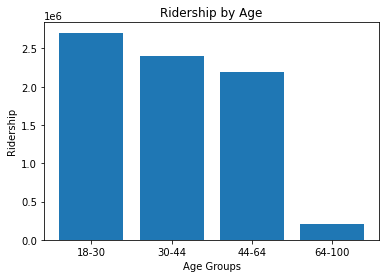

In [25]:
plt.bar(age_bin_label, age_counts)
plt.title("Ridership by Age")
plt.xlabel("Age Groups")
plt.ylabel("Ridership")